In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df =pd.read_csv('/content/Banking.csv')
df.head(5)


,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


<Axes: xlabel='Income Band'>

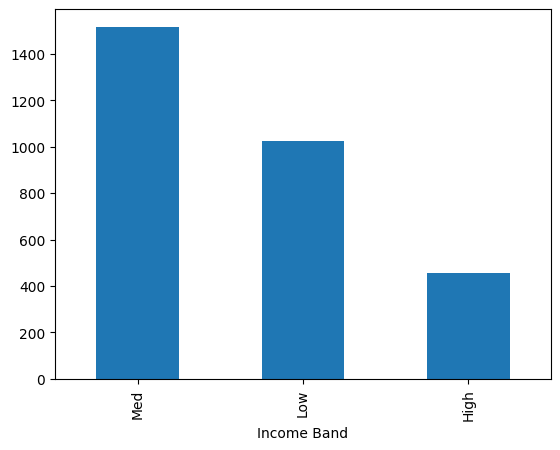

In [ ]:
bins = [0,100000,300000, float('inf')]
labels = ['Low','Med','High']

df['Income Band'] = pd.cut(df['Estimated Income'], bins=bins,labels=labels, right=False)

df['Income Band'].value_counts().plot(kind='bar')



In [ ]:

#Examine  the distrbution of unqiue cataegories in categorical columns
categorical_cols = df[["BRId","GenderId","IAId","Amount of Credit Cards",
"Nationality","Occupation","Fee Structure","Loyalty Classification","Properties Owned","Risk Weighting","Income Band"]].columns


for col in categorical_cols:
  print(f"Value Count for '{col}':")
  display(df[col].value_counts())


Value Count for 'BRId':


,count
BRId,
3,1352
1,660
2,495
4,493


Value Count for 'GenderId':


,count
GenderId,
2,1512
1,1488


Value Count for 'IAId':


,count
IAId,
1,177
2,177
3,177
4,177
8,177
9,176
13,176
12,176
10,176


Value Count for 'Amount of Credit Cards':


,count
Amount of Credit Cards,
1,1922
2,765
3,313


Value Count for 'Nationality':


,count
Nationality,
European,1309
Asian,754
American,507
Australian,254
African,176


Value Count for 'Occupation':


,count
Occupation,
Associate Professor,28
Structural Analysis Engineer,28
Recruiter,25
Account Coordinator,24
Human Resources Manager,24
...,...
Office Assistant IV,8
Automation Specialist I,7
Computer Systems Analyst I,6


Value Count for 'Fee Structure':


,count
Fee Structure,
High,1476
Mid,962
Low,562


Value Count for 'Loyalty Classification':


,count
Loyalty Classification,
Jade,1331
Silver,767
Gold,585
Platinum,317


Value Count for 'Properties Owned':


,count
Properties Owned,
2,777
1,776
3,742
0,705


Value Count for 'Risk Weighting':


,count
Risk Weighting,
2,1222
1,836
3,460
4,322
5,160


Value Count for 'Income Band':


,count
Income Band,
Med,1517
Low,1027
High,456


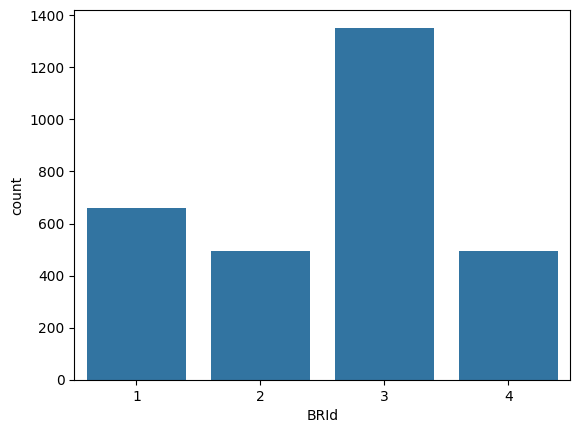

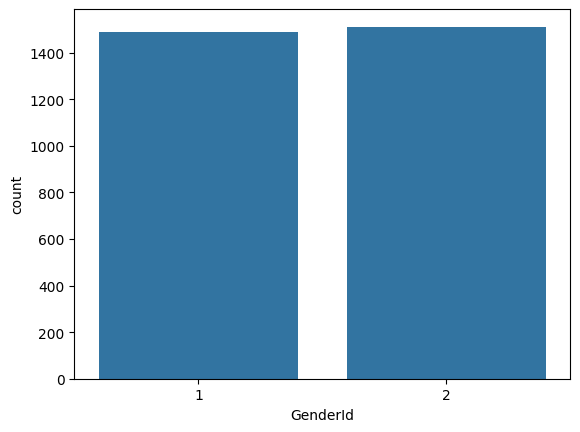

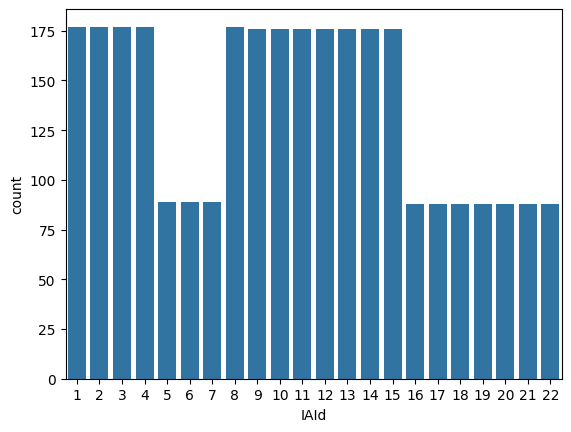

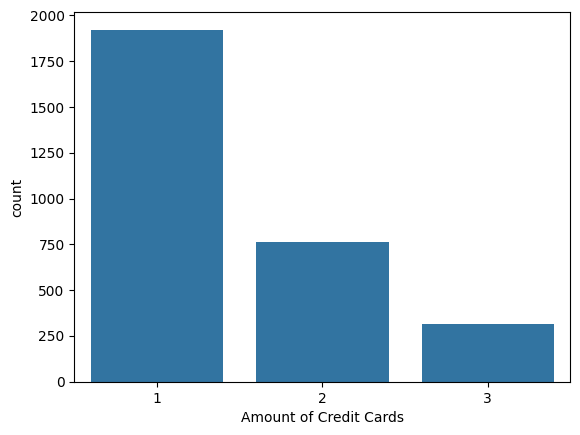

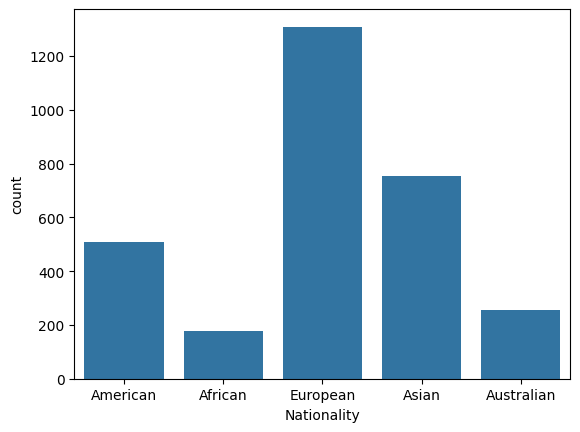

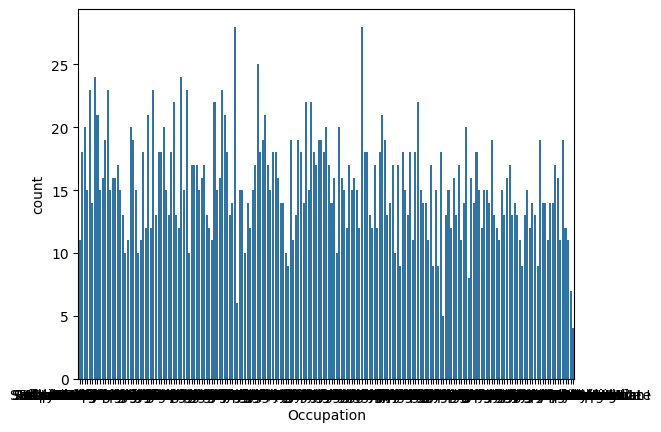

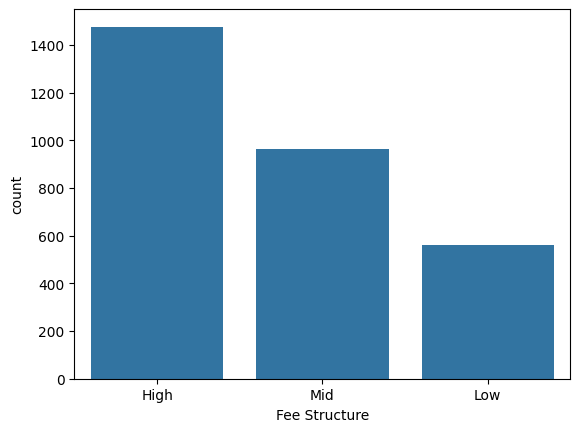

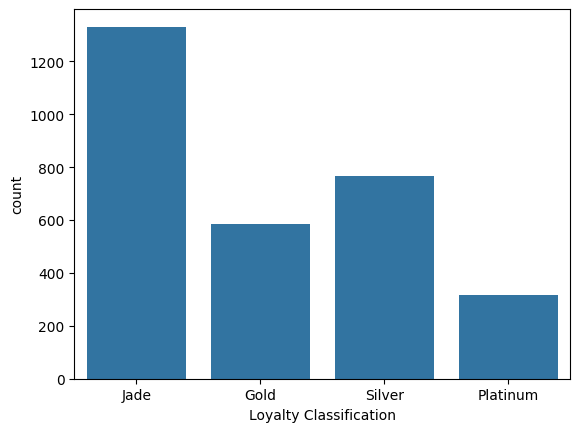

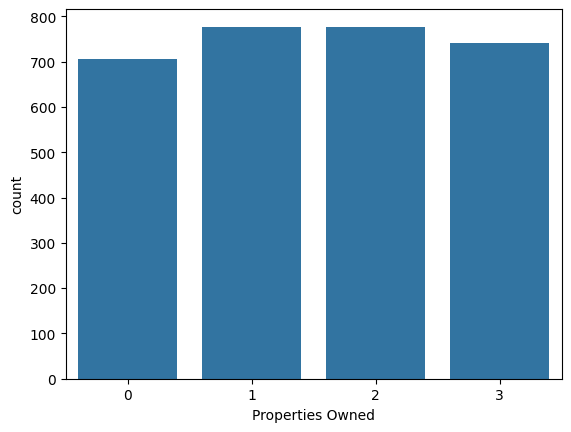

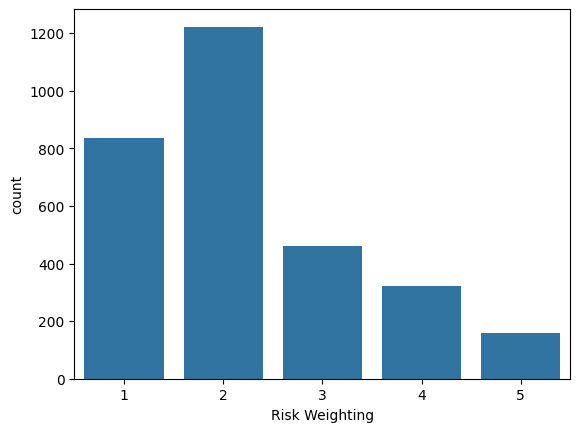

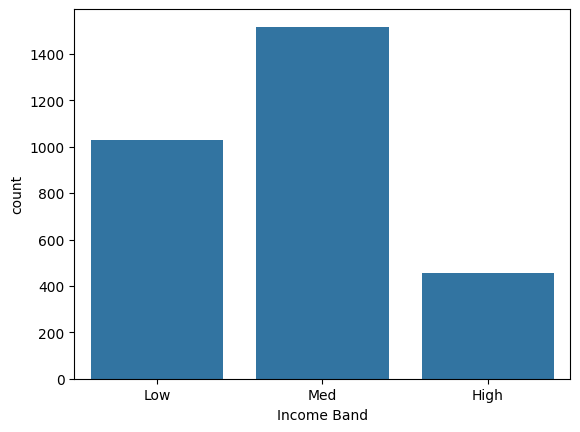

In [ ]:
for i, predictor in enumerate(df[["BRId","GenderId","IAId","Amount of Credit Cards","Nationality","Occupation","Fee Structure","Loyalty Classification","Properties Owned","Risk Weighting","Income Band"]].columns):
  plt.figure(i)
  sns.countplot(data=df, x=predictor)


# Bivariate Analysis

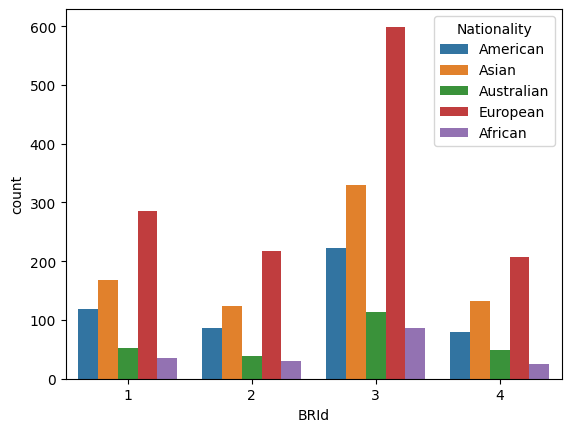

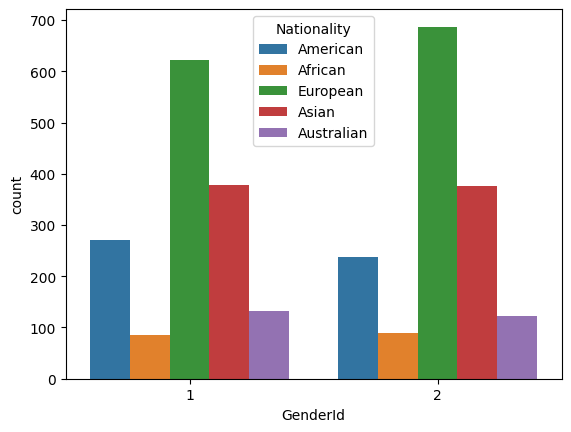

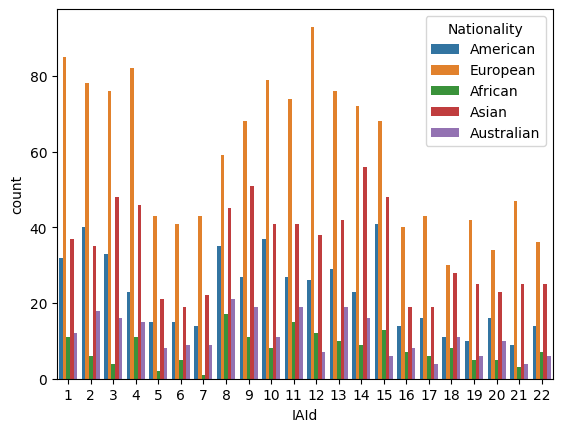

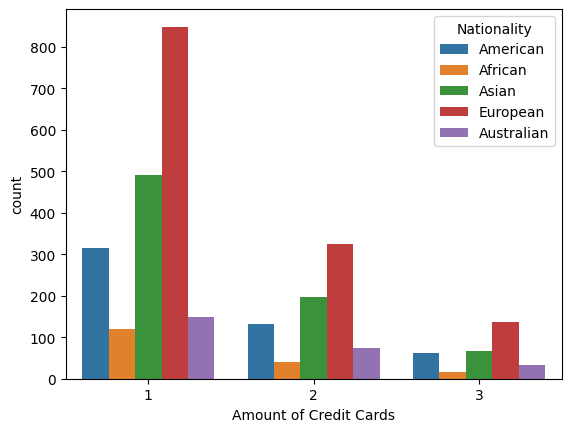

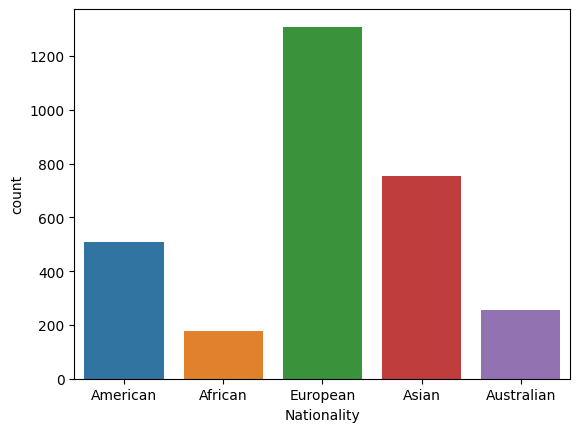

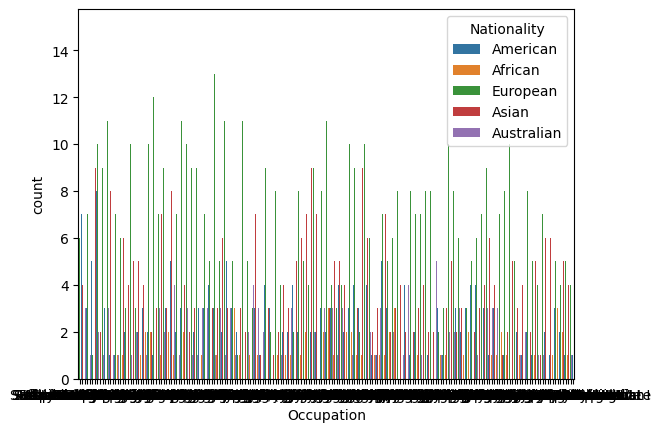

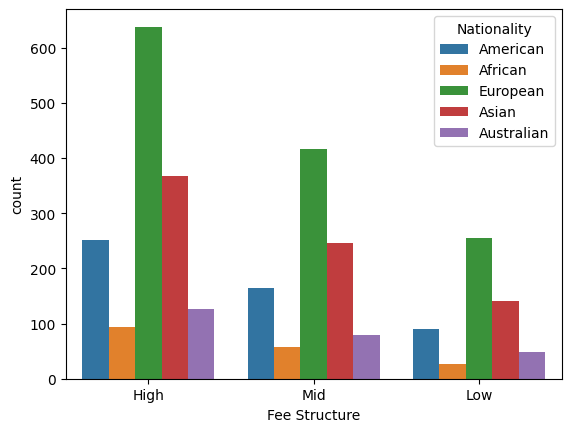

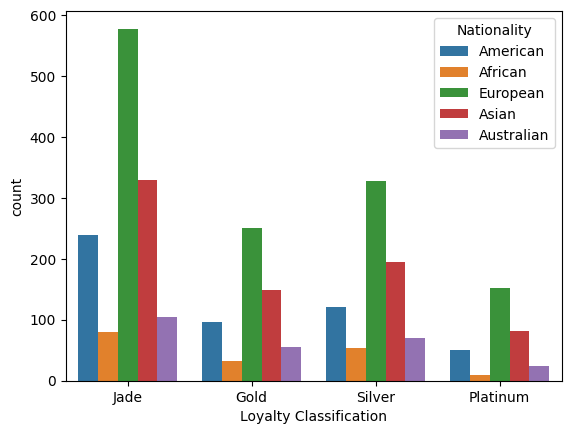

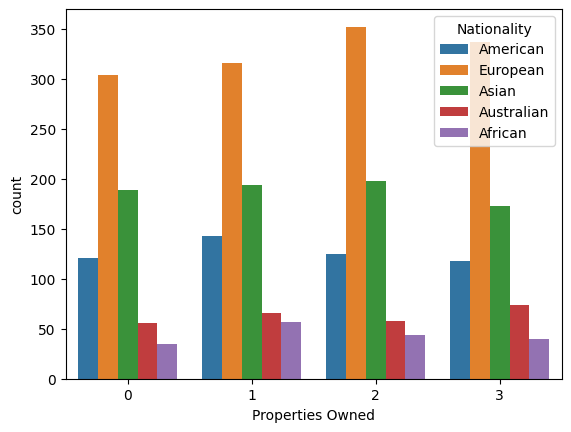

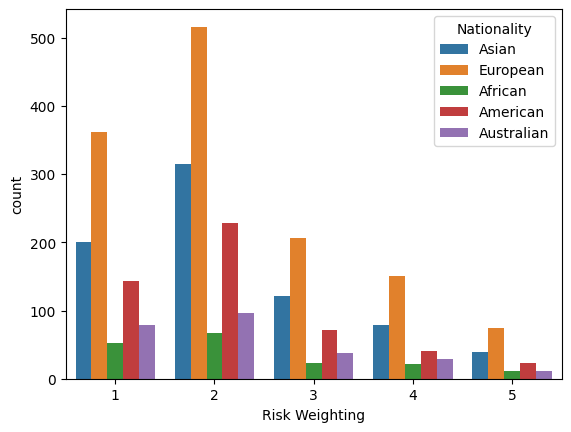

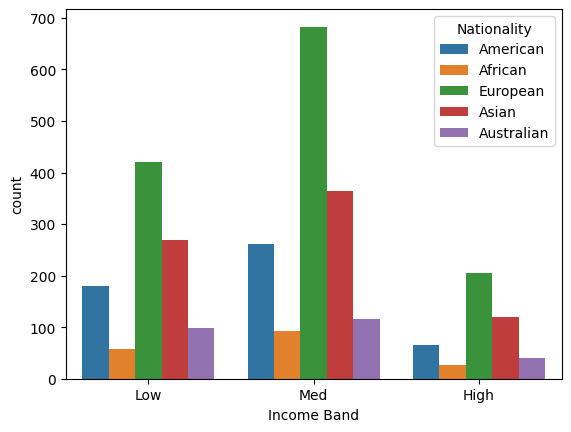

In [ ]:
for i, predictor in enumerate(df[["BRId","GenderId","IAId","Amount of Credit Cards","Nationality","Occupation","Fee Structure","Loyalty Classification","Properties Owned","Risk Weighting","Income Band"]].columns):
  plt.figure(i)
  sns.countplot(data=df, x=predictor , hue='Nationality')


# Numerical Analysis

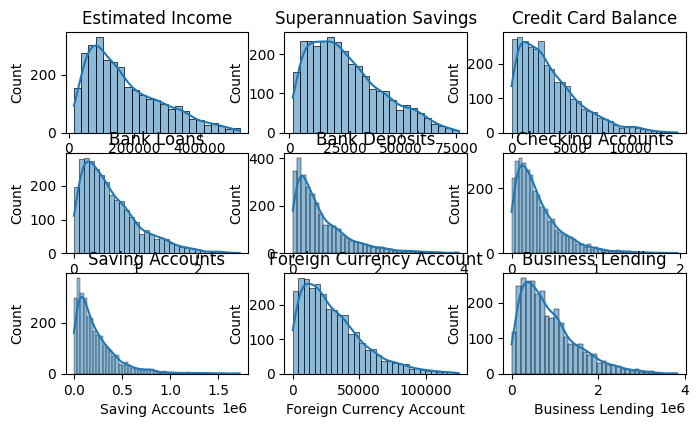

In [ ]:
numerical_cols = ['Estimated Income','Superannuation Savings','Credit Card Balance','Bank Loans','Bank Deposits','Checking Accounts','Saving Accounts','Foreign Currency Account','Business Lending']

plt.figure(figsize=(8,6))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,3,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.show()


# Heatmaps

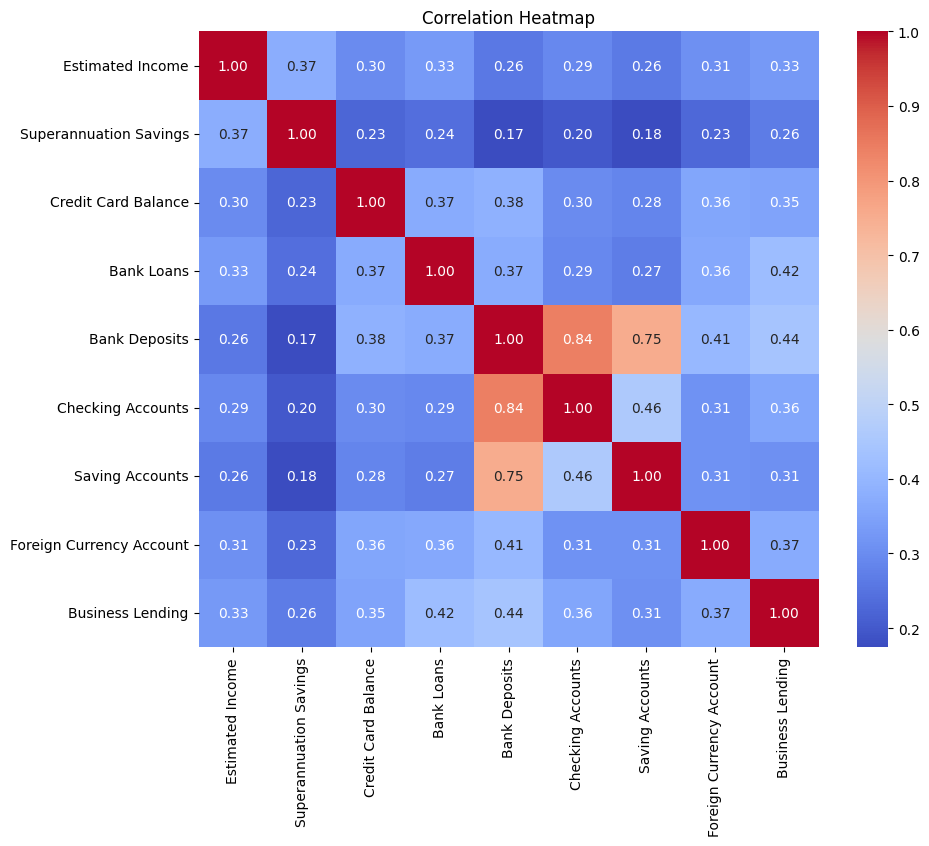

In [ ]:
numerical_cols = ['Estimated Income','Superannuation Savings','Credit Card Balance','Bank Loans','Bank Deposits','Checking Accounts','Saving Accounts','Foreign Currency Account','Business Lending']

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


#Insights of EDA:

1.The strongest postive correlation occur among "Bank Deposit" with "Checking Account" and "Foreigne Currency Account" indicating that customers who manintain high balances in one account type often hold substainal amount/funds across other accounts as well.